
# Comprehensive Analysis on Domestic Violence Against Women Dataset

This notebook contains an in-depth analysis of the dataset on domestic violence against women. The analysis includes descriptive statistics, correlation analysis, visualizations, and predictive modeling to understand the factors contributing to domestic violence.

## Loading the Data


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

file_path = 'data/Domestic violence.csv'
dataset = pd.read_csv(file_path)
dataset.columns = dataset.columns.str.strip()

dataset['Marital status'] = dataset['Marital status'].str.replace('unmarred', 'unmarried')
dataset['Violence'] = dataset['Violence'].str.strip()

dataset.head()


,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarried,no
3,4,22,tertiary,unemployed,0,unmarried,no
4,5,50,primary,unemployed,0,married,yes



## Descriptive Statistics



In [2]:
dataset.describe(include='all')


,SL. No,Age,Education,Employment,Income,Marital status,Violence
count,347.000000,347.000000,347,347,347.000000,347,347
unique,NaN,NaN,4,4,NaN,2,2
top,NaN,NaN,primary,unemployed,NaN,married,no
freq,NaN,NaN,132,274,NaN,300,261
mean,174.000000,31.380403,NaN,NaN,2110.685879,NaN,NaN
std,100.314505,9.601569,NaN,NaN,5743.278766,NaN,NaN
min,1.000000,15.000000,NaN,NaN,0.000000,NaN,NaN
25%,87.500000,23.000000,NaN,NaN,0.000000,NaN,NaN
50%,174.000000,30.000000,NaN,NaN,0.000000,NaN,NaN
75%,260.500000,39.500000,NaN,NaN,0.000000,NaN,NaN



## Correlation Analysis



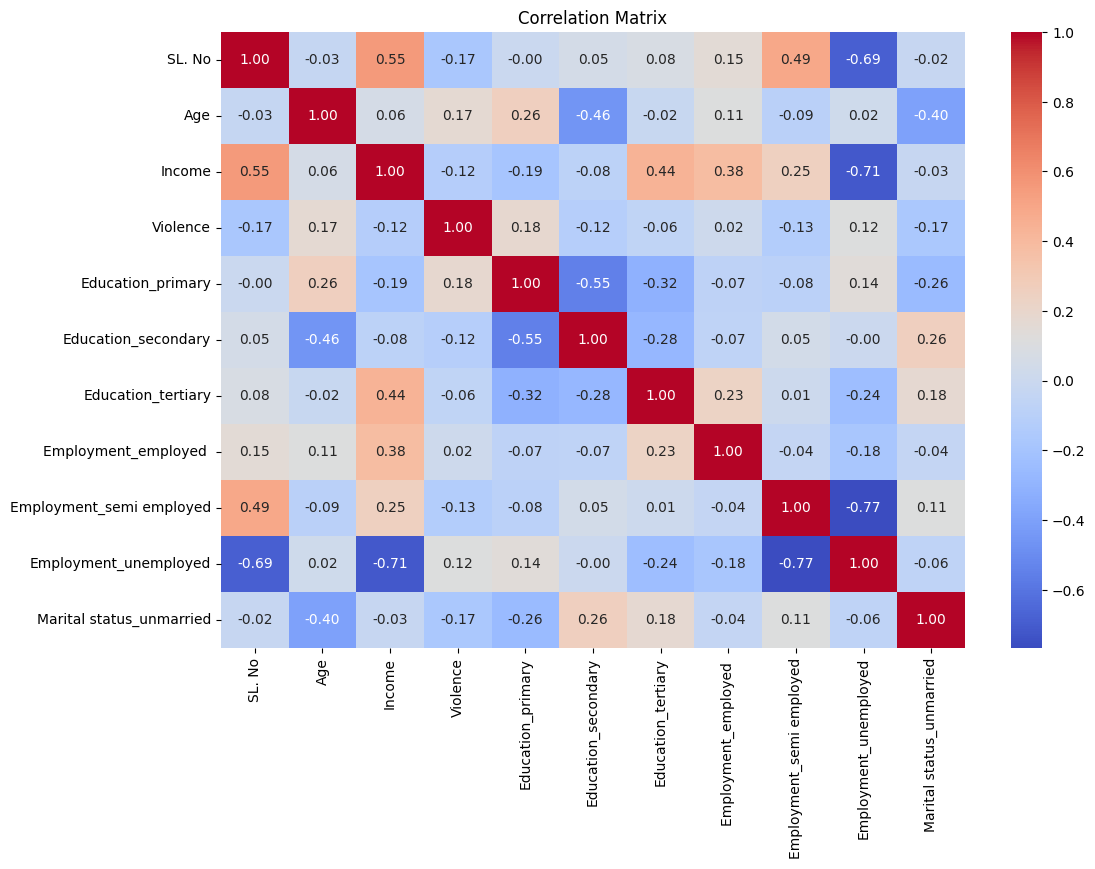

In [3]:
dataset_encoded = dataset.copy()
dataset_encoded['Violence'] = dataset_encoded['Violence'].map({'yes': 1, 'no': 0})
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['Education', 'Employment', 'Marital status'], drop_first=True)

corr_matrix = dataset_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



## Visualizations



#### Age distribution of respondents

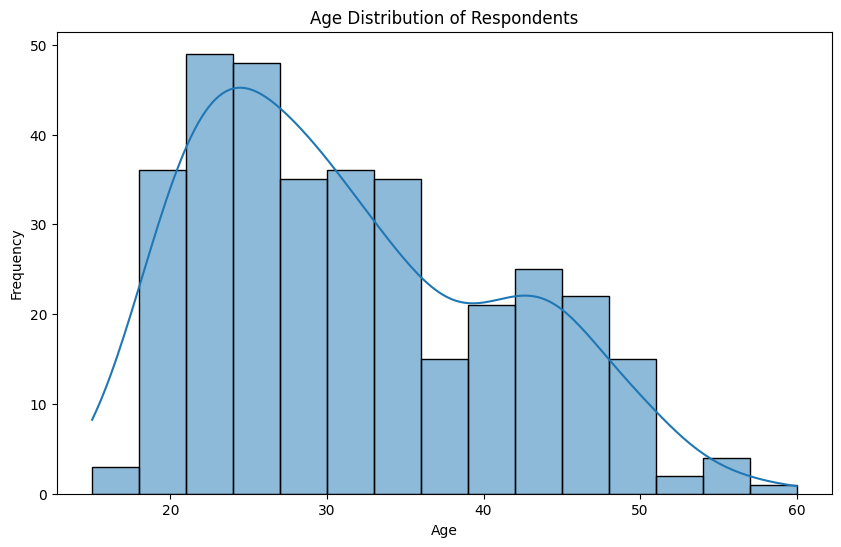

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=15, kde=True)
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Domestic violence by education level

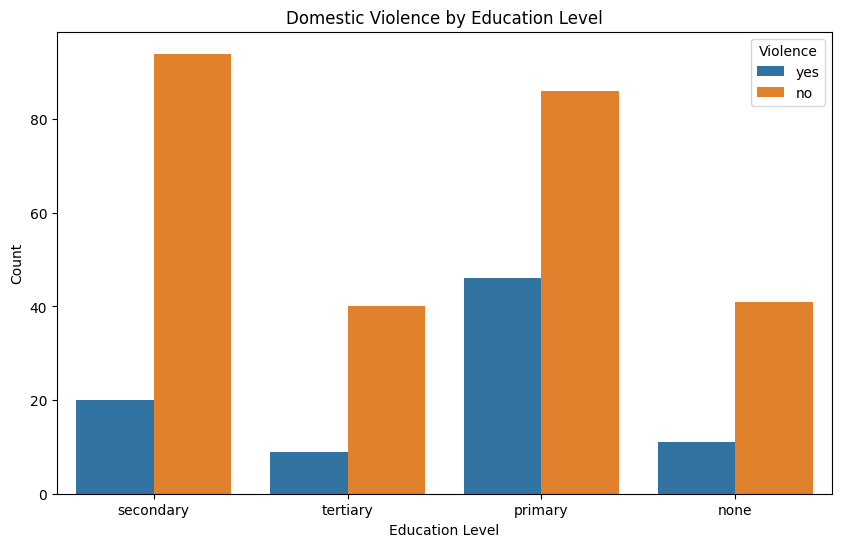

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Education', hue='Violence')
plt.title('Domestic Violence by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### Domestic violence by marital status

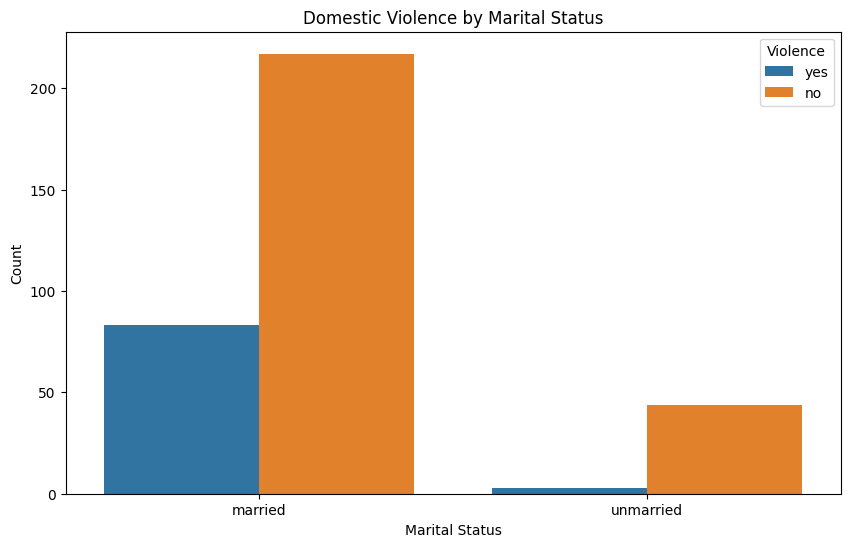

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Marital status', hue='Violence')
plt.title('Domestic Violence by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



## Predictive Modeling

We'll build a predictive model to understand the factors contributing to domestic violence.


In [5]:
X = dataset_encoded.drop(columns=['SL. No', 'Violence'])
y = dataset_encoded['Violence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        52
           1       0.50      0.33      0.40        18

    accuracy                           0.74        70
   macro avg       0.65      0.61      0.62        70
weighted avg       0.72      0.74      0.72        70

Confusion Matrix:
[[46  6]
 [12  6]]



### Logistic Regression Analysis

We'll use logistic regression to understand the impact of various factors on domestic violence.


In [13]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X_numeric = X.apply(pd.to_numeric, errors='coerce')

X_numeric = X_numeric.dropna()

y_aligned = y[X_numeric.index].astype(int)

X_numeric = sm.add_constant(X_numeric)

logit_model = sm.Logit(np.asarray(y_aligned).astype(float), np.asarray(X_numeric).astype(float))
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506317
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  347
Model:                          Logit   Df Residuals:                      337
Method:                           MLE   Df Model:                            9
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                 0.09578
Time:                        17:55:05   Log-Likelihood:                -175.69
converged:                       True   LL-Null:                       -194.30
Covariance Type:            nonrobust   LLR p-value:                 2.404e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5909      1.365      0.433      0.665      -2.085       3.267
x1             0.0210      0.


### Feature Importance

We'll use the feature importance scores from the Random Forest model to understand which factors are most influential.


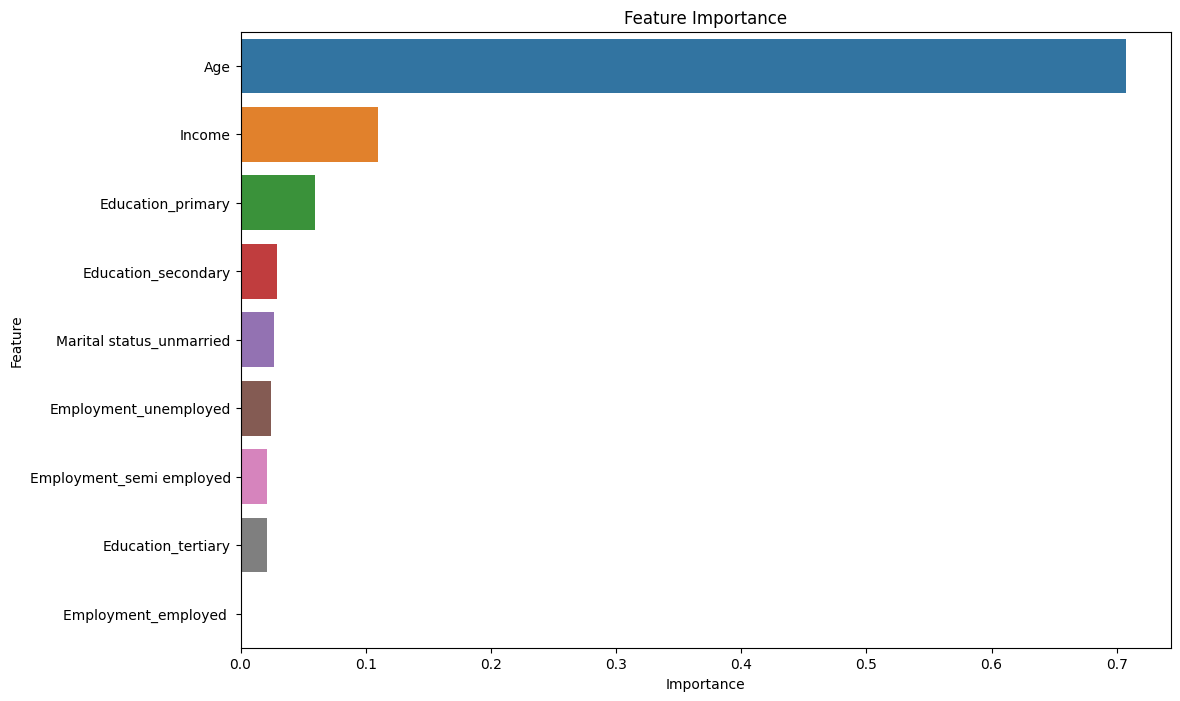

In [14]:
importances = model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()



## Summary

In this notebook, an in-depth analysis of the dataset on domestic violence against women is conducted. Here are the key findings:

1. **Descriptive Statistics:** Provided an overview of the dataset, showing the distribution of various variables.
2. **Correlation Analysis:** Identified the relationships between different socio-economic factors and domestic violence.
3. **Visualizations:** Illustrated the relationships between age, education level, marital status, and domestic violence.
4. **Predictive Modeling:** Built a Random Forest classifier to predict the likelihood of domestic violence based on socio-economic factors.
5. **Logistic Regression Analysis:** Offered a detailed look at the impact of each factor on domestic violence.
6. **Feature Importance:** Highlighted the most influential factors contributing to domestic violence.

### Conclusion

The analysis revealed that certain socio-economic factors, such as education level and marital status, significantly influence the occurrence of domestic violence. These insights can help in designing targeted interventions and policies to address and mitigate domestic violence in the studied area.

